### Microbe Analysis Notebook

In this project, we will analyze bacterial phyla that were found on keyboard keys as well as on finger tips. We will also take a look at this data on an individual basis. 

In doing so, we will be trying to answer the following questions:

* Are some bacteria highly correlated to another bacterial phyla?
* Do bacterial communities found on keyboard keys and fingertips differ on an individual basis?
* Is there a correlation between bacteria found on keyboard keys and on finger tips?

**Important:** The sklearn library is required 

Starting off with imports and getting an overview of the data

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
from pandas.plotting import parallel_coordinates as pcp
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE

In [2]:
df = pd.read_csv('OTUS_Adjusted.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 104 entries, 0 to 103
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Actinobacteria  104 non-null    float64
 1   Bacteroidetes   104 non-null    float64
 2   Cyanobacteria   104 non-null    float64
 3   Firmicutes      104 non-null    float64
 4   Fusobacteria    104 non-null    float64
 5   Proteobacteria  104 non-null    float64
 6   TM7             104 non-null    float64
 7   Thermi          104 non-null    float64
 8   Indiv           104 non-null    object 
 9   Finger_or_Key   104 non-null    object 
dtypes: float64(8), object(2)
memory usage: 8.2+ KB


In [3]:
df.head(3)

,Actinobacteria,Bacteroidetes,Cyanobacteria,Firmicutes,Fusobacteria,Proteobacteria,TM7,Thermi,Indiv,Finger_or_Key
0,0.613416,0.019417,0.068844,0.237423,0.004413,0.056487,0.000000,0.000000,M3,Rkey
1,0.744594,0.012274,0.013442,0.175921,0.008767,0.040327,0.003507,0.001169,M9,Thmr
2,0.810445,0.005803,0.001934,0.145068,0.000967,0.035783,0.000000,0.000000,M9,Pinr


### Are some bacteria highly correlated to another bacterial phyla?
Start off by creating a correlation matrix to discover correlations between the bacterial phyla

In [4]:
df_corr = df.corr()
mask = np.triu(df_corr)[1:, :-1]

**Plot 1:** Heatmap that shows the correlations between the relative abundances of the different Phyla

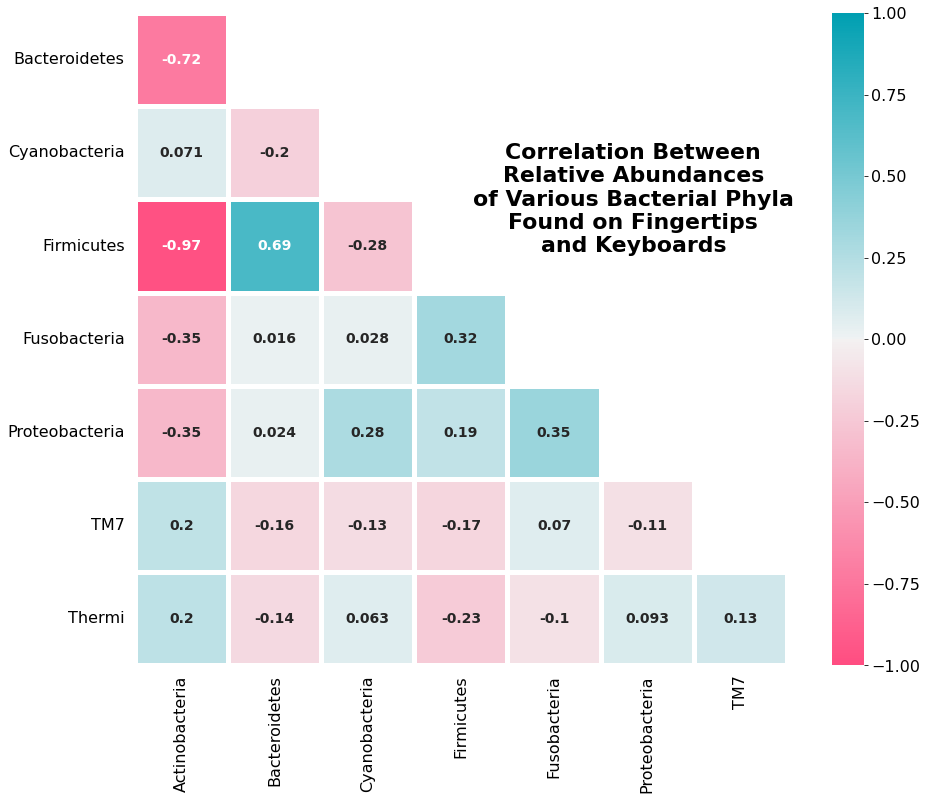

In [6]:
fig, ax = plt.subplots(figsize=(16,12))
cmap = sns.diverging_palette(0, 210, 100, 60, as_cmap=True)

sns.heatmap(df_corr.iloc[1:, :-1], mask=mask, annot=True, square=True,
            linewidths=5, cmap=cmap, vmin=-1, vmax=1,
            # cbar_kws={'shrink': 0.8},
            annot_kws={'fontsize': 14,
                        'weight': 'bold'})

plt.tick_params(axis='both', size=0, labelsize=16, pad=10)
plt.tick_params(axis='x', rotation=90)
plt.tick_params(axis='y', rotation=0)

cbar = ax.collections[0].colorbar
cbar.ax.tick_params(labelsize=16)

plt.text(x=5.35, y=2,
            s='Correlation Between\nRelative Abundances\nof Various Bacterial Phyla\n'
            + 'Found on Fingertips\nand Keyboards',
            fontsize='22', ha='center', va='center', weight='bold')

# plt.savefig('heatmap_microbe.png', bbox_inches='tight', facecolor='w', dpi=200)
# plt.savefig('heatmap_microbe.png', bbox_inches='tight', facecolor='w', dpi=1000)

plt.show()

We can see a significant positive correlation between the *Bacteroidetes* and *Firmucites* as well as a strong negative correlation between *Actinobacteria* and *Firmicutes*

### Do bacterial communities found on keyboard keys and fingertips differ on an individual basis?

**Plot 2:** Parallel coordinates plot to show how phylum abundances vary between individuals

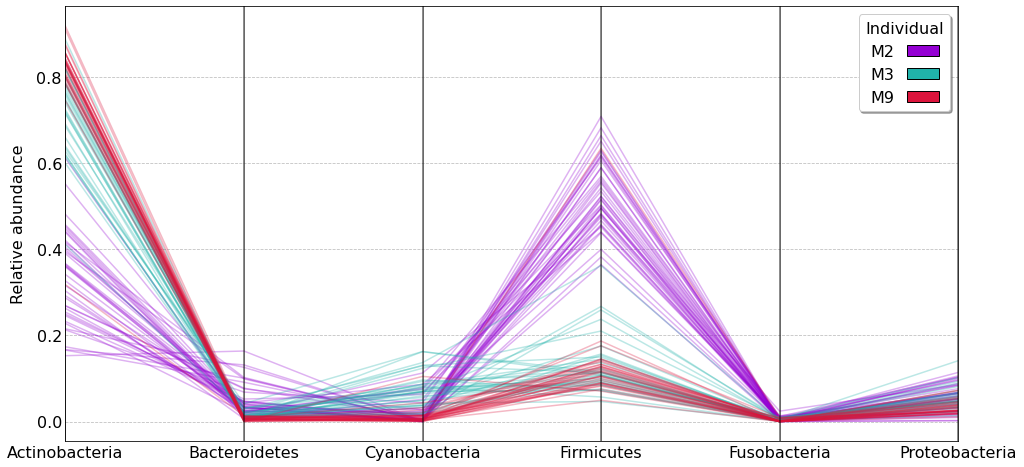

In [7]:
fig, ax = plt.subplots(figsize=(16,8))
pcp_colors = ['darkviolet', 'lightseagreen', 'crimson']

# Drop undesired columns and sort by df.Indiv then plot with PCP
pcp(df.drop(columns=['TM7', 'Thermi', 'Finger_or_Key']).sort_values(by=['Indiv']),
    class_column='Indiv', alpha=0.3, color=pcp_colors, axvlines_kwds = {'color': 'black',
                                                                        'alpha':0.6,})

ax.grid(axis='y', color='grey', alpha=0.5, linestyle='--')
ax.set_ylabel('Relative abundance', fontsize=16, labelpad=10)
ax.tick_params(axis='both', labelsize=16, size=0)

# Create legend
pcp_labels=['M2', 'M3', 'M9']
m2_patch = mpatches.Patch(color=pcp_colors[0], alpha=1, label=pcp_labels[0], ec='k')
m3_patch = mpatches.Patch(color=pcp_colors[1], alpha=1, label=pcp_labels[1], ec='k')
m9_patch = mpatches.Patch(color=pcp_colors[2], alpha=1, label=pcp_labels[2], ec='k')
artists = [m2_patch, m3_patch, m9_patch]
plt.legend(title='Individual', title_fontsize=16, handles=artists, labels=pcp_labels,
            fontsize=16, shadow=True, markerfirst=False)

# plt.savefig('pcp_microbe.png', bbox_inches='tight', facecolor='w', dpi=200)
# plt.savefig('parallel.png', bbox_inches='tight', facecolor='w', dpi=1000)
plt.show()

We can see see that individuals M3 and M9 are fairly similar, while individual M2 has a significantly different bacterial ecosystem

In [8]:
# Function to plot PCA or TSNE data
def plot_groups(data, groups, colors, labels=[], fontsize=14,
                legend_title='', title_fontsize=16,
                do_pca=True, alpha=0.6,figsize=[8,6],
                filename='image.png', save=False):
    '''
    Visualizes PCA or TSNE of data
    
        Parameters:
            data (pandas.DataFrame): data to be plotted
            groups (list): list of groups to be plotted
            colors (list): list of colors to be used for each group
            labels (list): list of labels to be used for each group
            fontsize (int): fontsize for labels
            legend_title (str): title for legend
            title_fontsize (int): fontsize for title
            do_pca (bool): whether to do PCA or TSNE
            alpha (float): transparency of points
            figsize (list): size of figure
            save (bool): whether to save the figure
            filename (str): name of file to save
    '''

    plt.figure(figsize=figsize)

    for i in range(len(np.unique(groups))):
        idx = groups == labels[i]
        plt.scatter(x=data[idx, 0], y=data[idx, 1], color=colors[i],
                    alpha=alpha, label=labels[i])

    plt.xlabel(f'{"$PC_1$" if do_pca else "$TSNE_1$"}' +
               f'{": " + str(round(evr_otus[0]*100)) + "%" if do_pca else ""}',
               fontsize=fontsize)
    plt.ylabel(f'{"$PC_2$" if do_pca else "$TSNE_2$"}' +
               f'{": " + str(round(evr_otus[1]*100)) + "%" if do_pca else ""}',
               fontsize=fontsize)
    plt.xticks([])
    plt.yticks([])

    plt.legend(title=legend_title, title_fontsize=title_fontsize, labels=labels,
               loc=1, fontsize=fontsize, markerfirst=False, shadow=True)

    if save:
        plt.savefig(filename, bbox_inches='tight', facecolor='w', dpi=200)
        # plt.savefig(filename, bbox_inches='tight', facecolor='w', dpi=1000)

    plt.show()

### Do bacterial communities found on keyboard keys and fingertips differ on an individual basis?

There are several bacterial phyla that we want to compare here, so in order to do so with a 2D plot, we will have to reduce the dimentions of the data with PCA

In [9]:
# Setup df and run PCA:
df_numeric = df.drop(columns=['Indiv', 'Finger_or_Key'])
pca = PCA(n_components=2)
pca_otus = pca.fit_transform(df_numeric)
evr_otus = pca.explained_variance_ratio_

**Plot 3:** 2D scatterplot showing all of the observations using PCA with colors to distinguish each of the three individuals

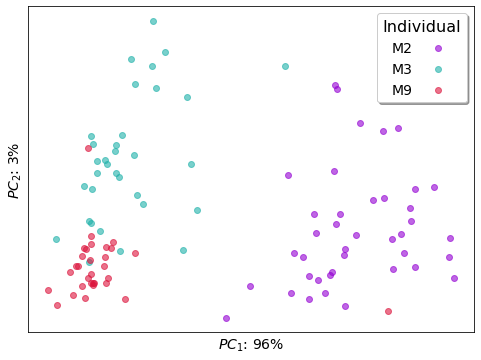

In [10]:
# Plot pca data with scatterplot through function
plot_groups(data=pca_otus, groups=df.Indiv, colors=['darkviolet', 'lightseagreen', 'crimson'],
            labels=['M2', 'M3', 'M9'], legend_title='Individual',
            save=False, filename='pca_indiv.png')

We can see that there are 3 mostly distinct groups differing by individual. We can also see that the individual M2 is much more different than the other individuals, but that there is still some significant difference between individuals M3 and M9 as well. 

### Is there a correlation between bacteria found on keyboard keys and on finger tips?

Now, instead of looking at the bacteria by individual, we want to see if there are differences between the bacteria found on keyboard keys and on finger tips.

In [11]:
# Setup df
df['dicot'] = 'Finger'
df.dicot = df.dicot.mask(df.Finger_or_Key.str.contains('key'), 'Key')

**Plot 4:** 2D scatterplot showing all of the observations using PCA with colors to distinguish sample locations

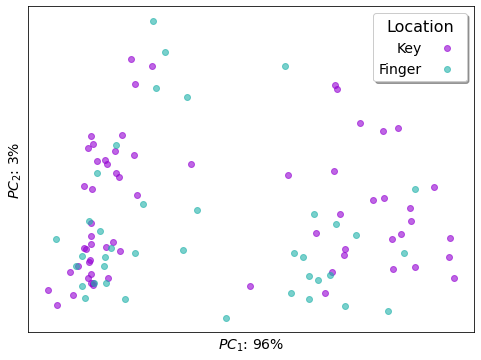

In [12]:
# Plot pca data with scatterplot through function
plot_groups(data=pca_otus, groups=df.dicot, colors=['darkviolet', 'lightseagreen'],
            labels=['Key', 'Finger'], legend_title='Location',
            save=False, filename='pca_loc.png')

We can see that no distinct groups of bacteria were found on keyboard keys and on finger tips, implying that the bacteria found on keyboard keys and on finger tips are largely the same. 

We can also take a look at using TSNE instead of PCA as a different form of dimensionality reduction to see if there is a difference in the bacteria found on keyboard keys and on finger tips.

In this case, we will look specifically at individual M3

In [13]:
# Setup df and run TSNE
df_m3 = df[df.Indiv == 'M3'].reset_index(drop=True)
df_numeric_m3 = df_m3.drop(columns=['Indiv', 'Finger_or_Key', 'dicot'])

tsne_m3 = TSNE(perplexity=10, random_state=146, init='random', learning_rate=200).fit_transform(df_numeric_m3)

**Plot 5:** 2D scatterplot showing all of the observations using TSNE with colors to distinguish sample locations

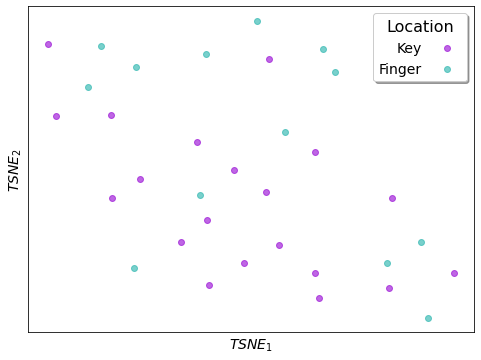

In [14]:
# Plot TSNE data with scatterplot through function
plot_groups(data=tsne_m3, groups=df_m3.dicot, colors=['darkviolet', 'lightseagreen'],
            labels=['Key', 'Finger'], legend_title='Location', do_pca=False,
            save=False, filename='tsne_m3.png')

Once again, no distinct groups are found, implying that the bacteria found on keyboard keys and on finger tips are likely one and the same. 